# **Aprendizaje no supervisado**

## **Clustering - K-Means**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [345]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [12]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [23]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 1 0 0 1 0]
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


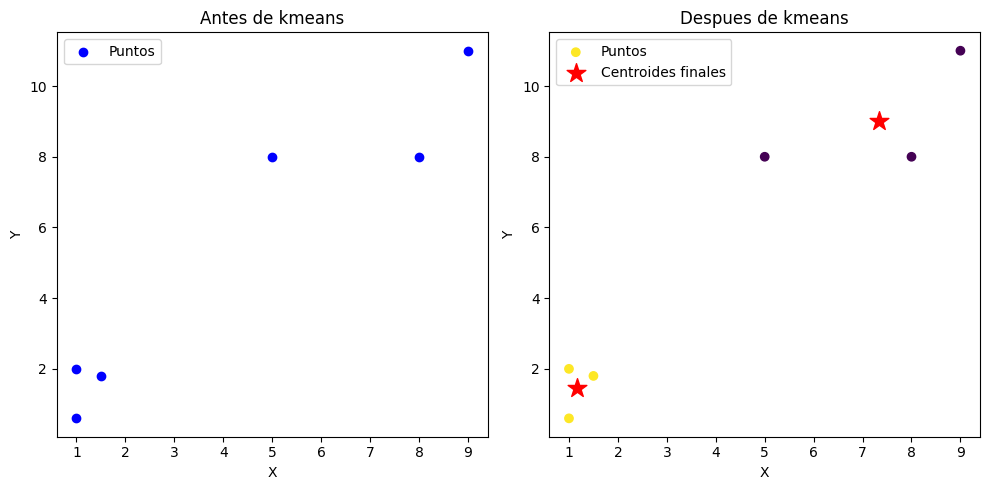

In [24]:
dibujar2D(points, kmeans.centroids, labels)

In [25]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[1 1 0 1 1 0]
[[7.    9.5  ]
 [2.875 3.1  ]]


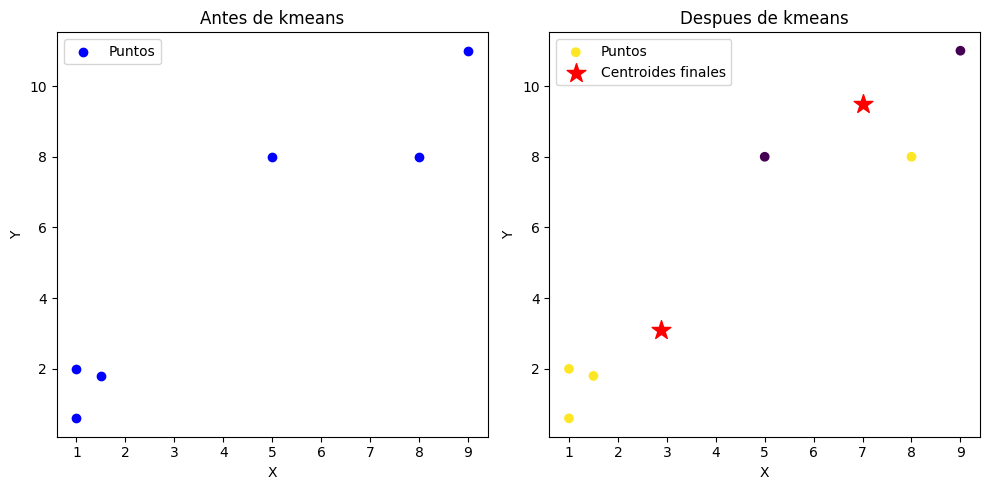

In [26]:
dibujar2D(points, kmeans.centroids, labels)

In [27]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 0 1 1 0 2]
[[ 1.83333333  1.6         2.2       ]
 [ 1.1         6.5         8.        ]
 [-8.          9.         11.        ]]


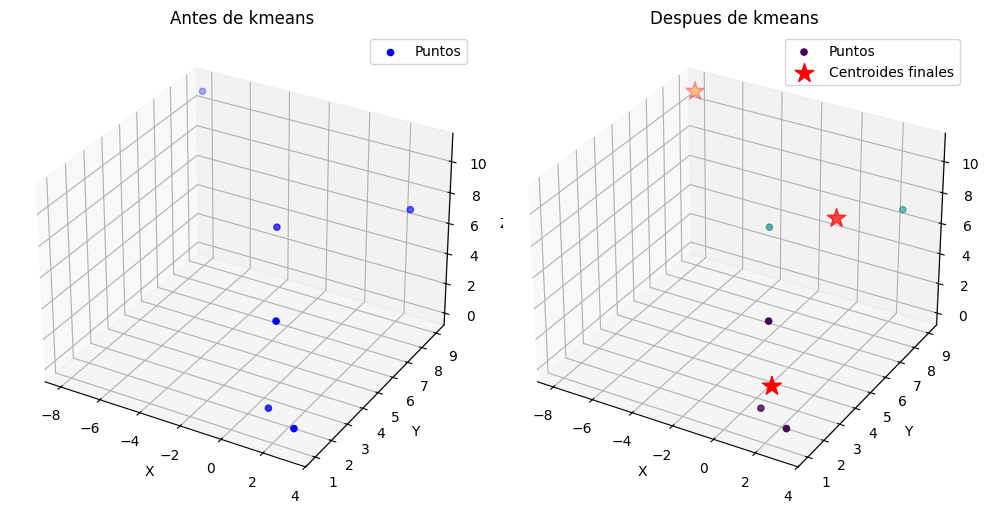

In [28]:
dibujar3D(points, kmeans.centroids, labels)

In [29]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [30]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 1 1 0 1 0 2 1 2 2 2 2 1 1 1 1 0 2 2 1 2 1 2 1 1 1 2 1 2 0 2 2 2 2 0 1 1
 1 2 1 2 2 1 1 2 1 1 2 1 1 1 0 0 1 0 1 1 1 1 0 2 1 1 2 0 1 1 1 1 1 2 1 1 1
 2 0 0 1 1 2 1 2 1 2 1 0 1 1 0 2 1 0 2 2 1 2 0 1 1 1 1 2 1 1 1 0 0 1 0 1 1
 2 1 1 1 2 2 0 2 1 0 1 1 0 1 1 2 1 1 0 0 2 1 1 1 0 0 0 0 1 2 1 0 0 1 2 1 1
 1 1 1 2 1 1 2 0 2 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 2 1 1 1 2 1 0 1 0 0
 1 2 0 0 2 2 0 2 1 2 0 1 1 0 1 2 1 1 1 2 1 1 0 1 1 2 1 1 1 0 2 1 1 2 1 0 1
 0 1 2 0 1 0 2 0 1 1 1 1 1 2 1 0 1 1 1 1 2 1 1 2 2 0 1 1 1 1 0 1 0 1 0 1 2
 2 2 1 1 0 1 0 1 0 2 2 1 1 2 0 2 0 0 1 0 2 1 0 1 2 2 0 0 1 1 0 1 1 2 2 1 2
 1 0 2 1 0 1 1 2 0 1 2 1 0 1 2 0 1 1 1 0 0 1 0 2 1 1 1 1 1 2 0 1 0 1 1 1 1
 2 0 2 2 1 2 1 1 1 2 1 1 0 0 0 1 1 1 0 0 2 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0
 2 1 0 1 2 2 1 0 0 1 2 2 1 0 1 2 2 1 1 1 1 2 2 2 1 1 2 0 1 0 1 1 1 0 2 1 0
 1 1 1 2 2 1 1 0 2 2 2 1 1 2 0 2 0 1 2 0 1 1 0 1 2 1 0 2 2 1 1 2 0 0 1 0 1
 2 2 1 0 0 2 1 2 2 1 2 1 0 0 0 1 0 1 1 1 2 2 0 1 1 1 2 2 0 2 0 2 1 1 2 1 1
 1 1 0 0 2 1 0 1 1 1 2 0 

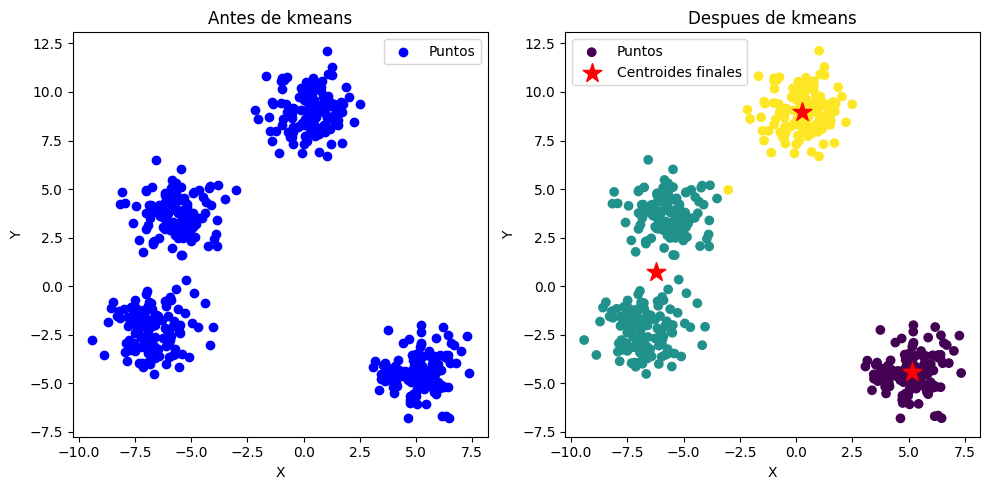

In [31]:
dibujar2D(points, kmeans.centroids, labels)

# EXPERIMENTOS

## **Punto 1**


Centroides finales:
[[-6.14212703  0.73255201]
 [ 5.22054811 -4.40112225]
 [ 0.14926918  8.86739812]]


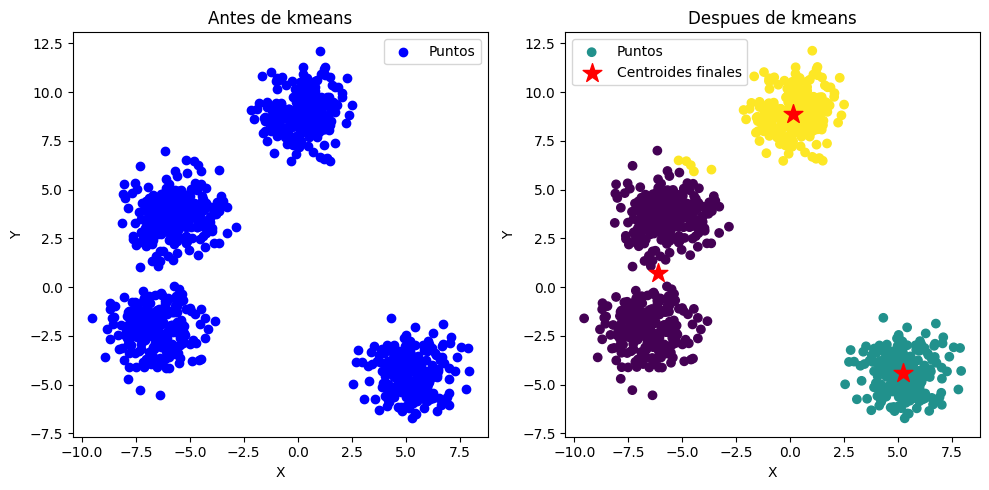

In [204]:
# Datos de ejemplo en 2D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, _ = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=3, max_iter=1000000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)

# Grafica Kmean
dibujar2D(points, kmeans.centroids, labels)

## **Punto 2**


Centroides finales:
[[-5.59637388 -3.77444934  2.9720632 ]
 [-1.87489628 -9.98410468  7.55642675]
 [ 0.28513392  8.92425092  5.20691558]]


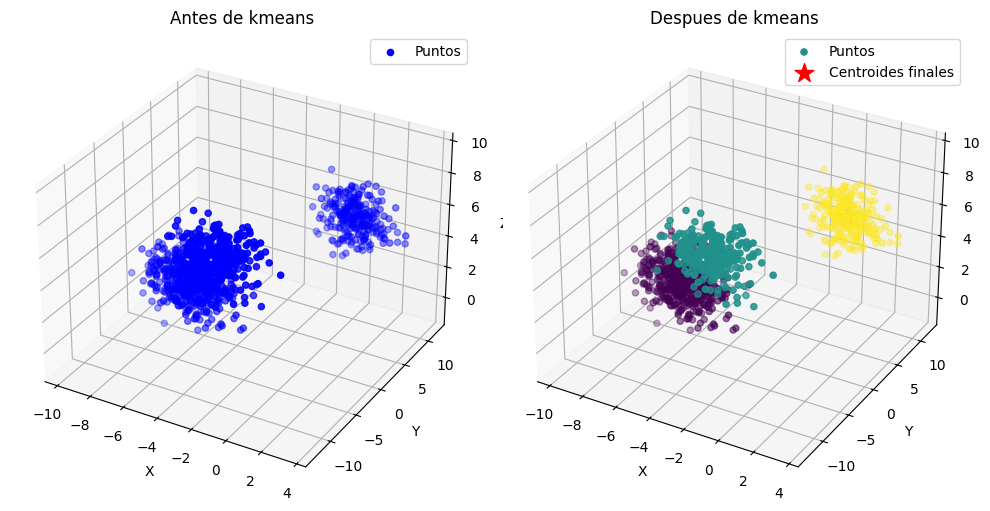

In [311]:
# Datos de ejemplo en 3D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=3, max_iter=4000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)

# Grafica Kmean
dibujar3D(points, kmeans.centroids, labels)

## **Punto 3**

In [321]:
# Datos de ejemplo en 2D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=10, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=3, max_iter=10000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print(labels)
print("\nCentroides finales:")
print(kmeans.centroids)

[1 0 0 1 0 1 1 1 0 2 1 1 1 0 2 2 0 0 2 2 2 0 2 0 1 1 0 2 1 0 0 2 2 2 2 1 0
 1 1 0 2 0 1 2 1 2 2 0 0 2 2 0 2 0 0 2 0 1 0 0 2 1 2 0 0 2 2 2 0 0 0 2 1 0
 0 0 1 2 0 0 0 2 0 0 2 1 0 0 0 2 2 0 2 2 0 0 1 0 2 0 1 1 2 2 2 2 0 0 1 2 2
 1 2 1 2 2 0 1 0 0 2 1 0 0 1 1 2 2 0 2 0 0 1 0 2 0 0 1 2 2 0 0 2 2 2 2 2 0
 2 0 0 2 0 1 1 0 0 1 2 1 2 0 1 0 1 1 0 2 0 0 2 0 0 0 0 1 2 1 0 0 0 1 0 2 0
 1 0 0 0 0 0 1 1 0 1 2 0 0 0 1 2 0 0 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 1 0 0 2
 2 2 1 2 1 2 2 2 2 0 2 0 1 2 0 0 0 0 0 0 1 1 1 0 2 2 1 2 0 0 0 0 0 1 1 0 0
 0 2 1 0 0 2 0 0 0 1 0 1 0 0 2 0 2 2 1 0 0 0 1 1 2 0 2 0 0 0 1 0 0 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 0 1 0 1 0 2 1 0 1 2 0 0 1
 1 0 0 0 0 0 1 0 2 1 0 1 0 2 1 0 0 2 0 2 2 0 1 1 1 0 0 2 0 0 0 0 0 0 0 2 0
 2 2 1 2 2 2 2 0 2 0 0 0 0 0 0 1 0 1 2 2 0 2 2 2 2 0 0 0 0 1 0 2 0 2 0 2 2
 1 0 1 2 0 0 1 0 2 1 0 0 0 0 0 0 1 0 1 1 2 0 2 0 1 1 0 2 0 0 2 0 1 1 0 1 0
 2 0 1 0 1 0 2 0 1 0 1 2 0 1 1 0 2 0 0 0 0 0 1 2 0 1 0 0 0 0 1 2 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 

## **Punto 4**

In [331]:
# Datos de ejemplo en 2D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=100, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=3, max_iter=10000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print(labels)
print("\nCentroides finales:")
print(kmeans.centroids)

[1 2 0 2 2 2 0 1 0 0 1 2 2 0 0 2 2 2 2 2 2 0 1 2 1 2 2 0 0 1 2 2 0 2 2 2 2
 2 2 2 2 1 2 1 2 0 2 2 1 1 1 1 1 2 2 0 2 2 2 2 1 2 1 0 2 2 0 0 1 2 2 0 0 0
 1 1 0 0 0 2 1 0 2 2 2 1 2 2 1 2 2 0 1 2 2 0 2 0 2 2 2 0 0 0 2 1 0 2 2 2 1
 2 1 0 0 0 2 2 2 1 0 2 2 1 1 2 2 1 0 2 1 2 0 2 0 2 2 1 2 1 2 2 2 0 2 2 2 2
 2 1 2 2 1 1 0 2 0 2 2 2 1 0 0 1 0 1 0 2 0 2 2 1 0 2 0 2 1 0 2 2 1 1 2 1 2
 0 1 2 2 2 0 1 0 2 1 2 2 1 2 1 1 1 2 2 2 0 2 2 0 2 2 0 0 0 0 0 2 2 0 0 0 0
 1 0 1 0 1 1 2 2 2 2 2 0 1 2 2 2 2 2 0 2 0 1 0 1 2 2 0 2 0 2 2 0 2 2 0 2 0
 0 1 2 1 1 2 2 2 2 0 2 0 2 0 0 1 1 2 0 2 2 2 2 1 2 1 1 0 1 2 0 2 2 2 0 1 2
 0 0 2 2 1 1 1 1 1 2 2 1 2 1 2 0 2 2 1 1 2 2 1 2 1 0 2 2 2 2 0 2 1 2 2 0 2
 0 2 2 2 2 2 2 2 0 2 2 2 1 2 2 0 2 2 1 1 2 2 1 0 1 0 0 2 1 2 0 2 0 1 2 2 2
 1 1 2 2 0 2 2 1 0 2 0 2 1 0 0 0 1 2 1 0 0 0 2 1 1 1 2 2 0 2 2 2 2 2 2 1 1
 2 1 0 0 1 1 0 0 1 2 2 0 1 2 1 2 2 0 2 0 0 2 2 2 2 2 0 2 2 0 0 2 2 2 2 0 1
 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 1 0 1 0 1 2 1 0 2 0 0
 2 0 2 2 1 2 0 0 2 1 0 0 

## **Punto 5**

### K = 2


Centroides finales:
[[-4.33107149 -5.88573215  4.53074681]
 [ 0.28513392  8.92425092  5.20691558]]


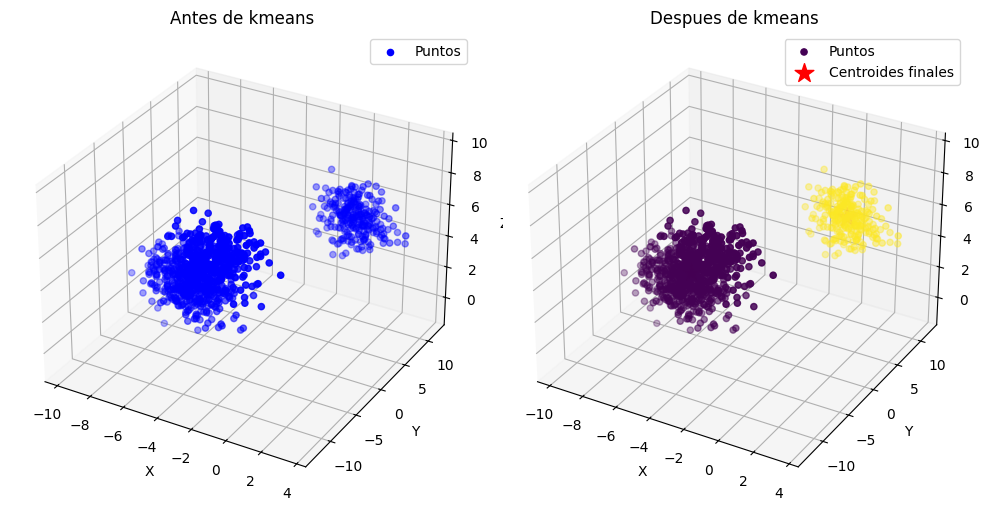

In [349]:
# Datos de ejemplo en 3D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=2, max_iter=1000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)


# Grafica Kmean
dibujar3D(points, kmeans.centroids, labels)

### K = 3


Centroides finales:
[[-5.59637388 -3.77444934  2.9720632 ]
 [-1.87489628 -9.98410468  7.55642675]
 [ 0.28513392  8.92425092  5.20691558]]


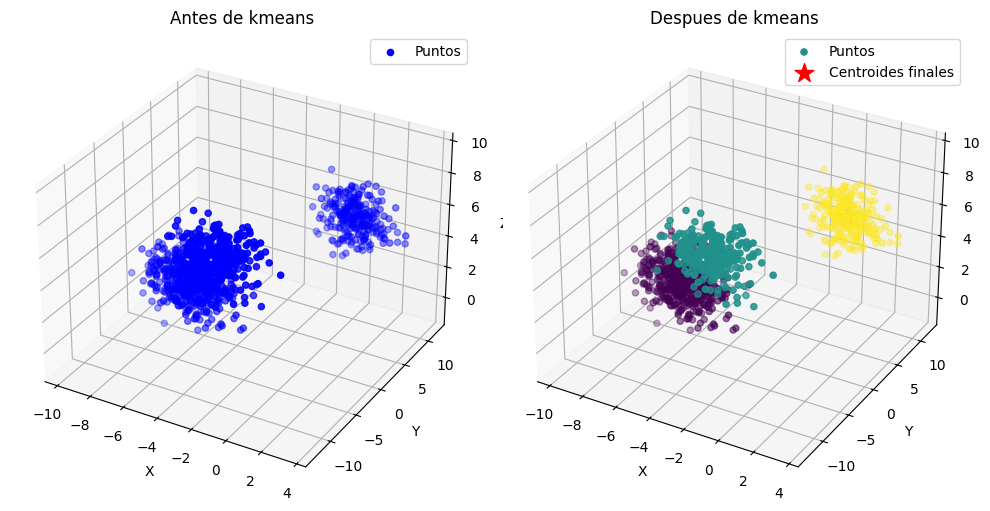

In [354]:
# Datos de ejemplo en 3D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=3, max_iter=1000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)

# Grafica Kmean
dibujar3D(points, kmeans.centroids, labels)

### K = 5

In [368]:
# Datos de ejemplo en 3D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=5, max_iter=1000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)

# Grafica Kmean
#dibujar3D(points, kmeans.centroids, labels)


Centroides finales:
[[ -6.74132756  -2.04993975   2.37756793]
 [ -0.95131063 -10.26964547   7.74676091]
 [ -2.70817352  -9.85934707   7.51310525]
 [ -4.40820494  -5.52657783   3.59054702]
 [  0.28513392   8.92425092   5.20691558]]


### K = 10

In [478]:
# Datos de ejemplo en 3D
from sklearn.datasets import make_blobs

# Puntos en Kmean
points, y = make_blobs(n_samples=1000, n_features=3, centers=4, random_state=23)

# Kmean con iteración
kmeans = KMeans(k=10, max_iter=1000) # Editar el valor de "max_iter" según el número de iteraciones que se requiera
labels = kmeans.run(points)

# Resultados
print("\nCentroides finales:")
print(kmeans.centroids)

# Grafica Kmean
#dibujar3D(points, kmeans.centroids, labels)


Centroides finales:
[[ -1.29574413  -9.49121967   7.65957223]
 [ -4.01884384  -6.7323869    4.20763652]
 [ -6.33757028  -1.31691108   2.34902298]
 [ -5.16366594  -5.88526193   2.66794563]
 [ -4.94731992  -4.8778927    4.48097949]
 [ -7.7040807   -2.28357973   2.52716356]
 [ -5.6782308   -3.11747845   2.14333591]
 [ -3.2886536   -5.05585294   3.23237741]
 [  0.28513392   8.92425092   5.20691558]
 [ -2.47400212 -10.6957757    7.60162285]]


## **Punto 6**

In [ ]:
# Generar datos de ejemplo en 2D con 1000 muestras y 5 clusters
points, _ = make_blobs(n_samples=1000, n_features=2, centers=5, random_state=23)
kmeans = KMeans(k=5, max_iter=1000)
labels_euclidean = kmeans.run(points, tipo_distance="euclidean")

# distancia Manhattan
labels_manhattan = kmeans.run(points, tipo_distance="manhattan")

# distancia Mahalanobis
labels_mahalanobis = kmeans.run(points, tipo_distance="mahalanobis")



In [157]:
# Resultados
print("\nCentroides finales (Euclidiana):")
print(kmeans.centroids)

print("\nCentroides finales (Manhattan):")
print(kmeans.centroids)

print("\nCentroides finales (Mahalanobis):")
print(kmeans.centroids)




Centroides finales (Euclidiana):
[[  1.36223644   9.29777524   4.51358222]
 [ -0.1534261    9.54359814   5.78749185]
 [ -1.04800805  -9.65120819   7.65425371]
 [  0.63491086   7.98708537   5.81162467]
 [ -6.30404577  -2.0150349    3.37391377]
 [ -2.59999171 -10.40035256   7.58599827]
 [ -0.5216352    8.6247567    4.23653186]
 [ -7.28245624  -1.44514588   1.92578948]
 [ -6.25760926  -3.24335287   2.02182884]
 [ -4.36548997  -5.59582615   3.61683242]]

Centroides finales (Manhattan):
[[  1.36223644   9.29777524   4.51358222]
 [ -0.1534261    9.54359814   5.78749185]
 [ -1.04800805  -9.65120819   7.65425371]
 [  0.63491086   7.98708537   5.81162467]
 [ -6.30404577  -2.0150349    3.37391377]
 [ -2.59999171 -10.40035256   7.58599827]
 [ -0.5216352    8.6247567    4.23653186]
 [ -7.28245624  -1.44514588   1.92578948]
 [ -6.25760926  -3.24335287   2.02182884]
 [ -4.36548997  -5.59582615   3.61683242]]

Centroides finales (Mahalanobis):
[[  1.36223644   9.29777524   4.51358222]
 [ -0.1534261 

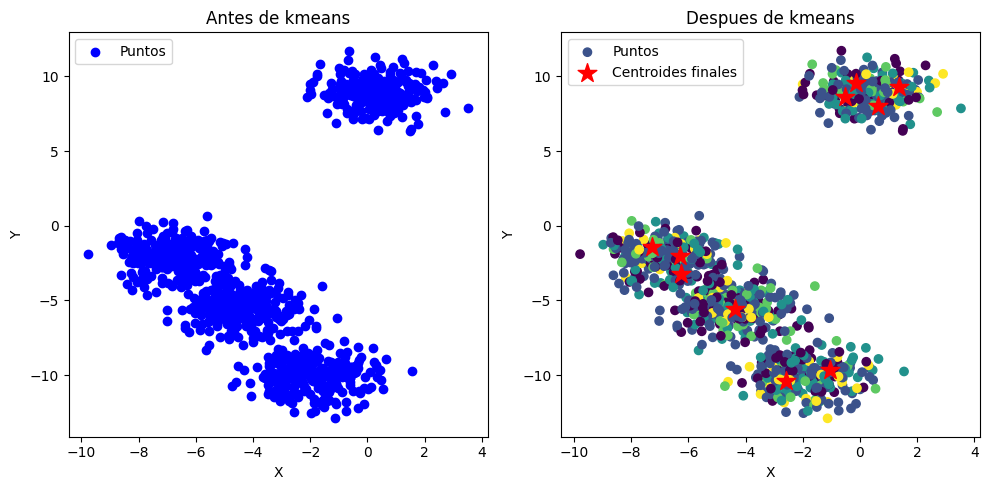

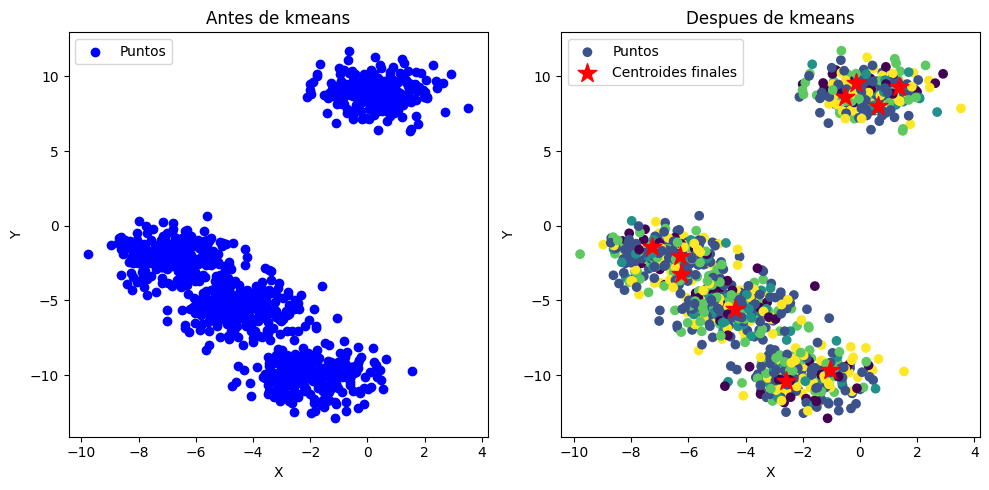

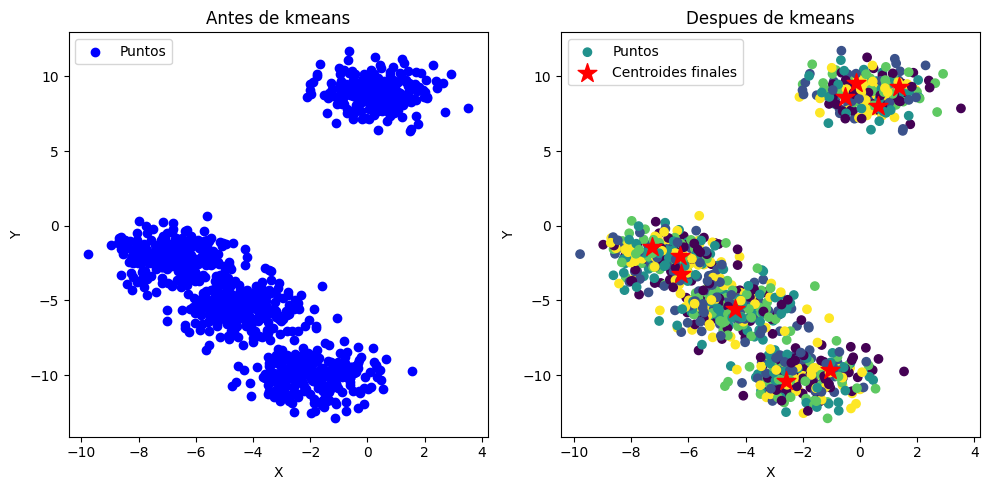

In [161]:
# Graficas
dibujar2D(points, kmeans.centroids, labels_euclidean)
dibujar2D(points, kmeans.centroids, labels_manhattan)
dibujar2D(points, kmeans.centroids, labels_mahalanobis)